### Импорт библиотек

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

### Загрузка данных

In [10]:
import mnist

In [8]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [17]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Подготовка данных

Нормализация к виду -0.5 до 0.5

In [11]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

Одна картинка - вектор длины 784 пикселя

In [13]:
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

### Самописная двухслойная нейронная сеть

In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [43]:
class AI2:
    def __init__(self):
        self.w0 = np.array([])
        self.w1 = np.array([])
    
    def fit(self, X, y, w0, w1, iteration, alpha):
        for i in range(iteration):
            # прямое распространение(feed forward)
            layer0 = X
            layer1 = sigmoid(np.dot(layer0, w0))
            layer2 = sigmoid(np.dot(layer1, w1))

            # обратное распространение(back propagation) с использованием градиентного спуска
            layer2_error = y - layer2
            layer2_delta = layer2_error * sigmoid_deriv(layer2)

            layer1_error = layer2_delta.dot(w1.T)
            layer1_delta = layer1_error * sigmoid_deriv(layer1)

            w1 += layer1.T.dot(layer2_delta) * alpha
            w0 += layer0.T.dot(layer1_delta) * alpha

            error = np.mean(np.abs(layer2_error))
            accuracy = (1 - error) * 100

            if i%10 == 0:
                print('Ошибка:{}, Accuracy:{}'.format(error, accuracy))

        self.w0 = w0
        self.w1 = w1
        
    def predict(self, X):
        layer0 = X
        layer1 = sigmoid(np.dot(layer0,self.w0))
        layer2 = sigmoid(np.dot(layer1,self.w1))
        
        return(layer2)

### Обучение

In [44]:
model = AI2()

In [45]:
w0 = 2*np.random.random((784, 64)) - 1 # для входного слоя   - 784 входа, 64 выхода
w1 = 2*np.random.random((64, 10)) - 1 # для внутреннего слоя - 64 входов, 10 выхода

In [46]:
model.fit(train_images, to_categorical(train_labels), w0, w1, 100, 0.001)

Ошибка:0.4591901976216542, Accuracy:54.08098023783459


C:\Users\alimc\AppData\Local\Temp/ipykernel_20356/1509215397.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Ошибка:0.10000057522777221, Accuracy:89.99994247722279
Ошибка:0.10061756271635496, Accuracy:89.93824372836451
Ошибка:0.46795549720933505, Accuracy:53.20445027906649
Ошибка:0.11179073346779234, Accuracy:88.82092665322077
Ошибка:0.17378817834382046, Accuracy:82.62118216561795
Ошибка:0.11623782967281547, Accuracy:88.37621703271846
Ошибка:0.09136361094505488, Accuracy:90.86363890549451
Ошибка:0.06506639268615998, Accuracy:93.493360731384
Ошибка:0.05187291188666087, Accuracy:94.8127088113339


### Предсказание

In [49]:
y_pred = model.predict(test_images)

C:\Users\alimc\AppData\Local\Temp/ipykernel_20356/1509215397.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


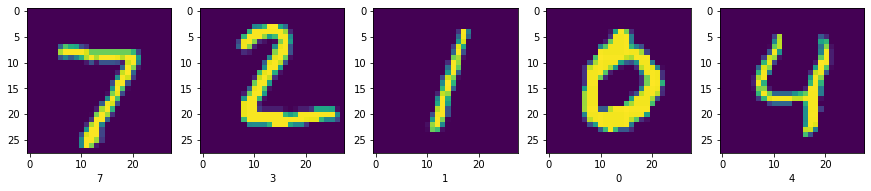

In [54]:
N = 5
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(3 * N, 5))

for i in range(N):
  plt.subplot(1, N, i+1)
  plt.imshow(test_images[i,:].reshape(28, 28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()